In [1]:
#import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import matplotlib.image as mig
from PIL import Image
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import os

In [2]:
categories=['ANGRY','HAPPY','NEUTRAL','SAD']

In [3]:
#data retrieve for cnn face 
im=Image.open(".//jaffe//SAD//sad10.jpg")
path=".//jaffe"

In [5]:
#creating more images
vid=cv2.VideoCapture(0)

face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for i in categories:
    lis_image=os.listdir(os.path.join(".//jaffe//{}".format(i)))
    iter_num=len(lis_image)
    no_samples=iter_num+100
    while iter_num< no_samples:
        rt,frame=vid.read()
        frame=cv2.resize(frame,(640,480))
        im1=cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)

        face=face_cascade.detectMultiScale(im1,1.3,5)

        for x,y,w,h in face:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.waitKey(100)
            iter_num=iter_num+1
            lower=i.lower()
            num=lower+str(iter_num)#concating file with number for naming purpose
            im_f=im1[y:y+h,x:x+w]#cropping the face from whole image
            im_f=cv2.resize(im_f,(256,256))

            cv2.putText(frame,'sample_no'+str(i),(x,y),cv2.FONT_ITALIC,1,(255,0,255),2,cv2.LINE_AA)

            path='.//jaffe//{}//{}.jpg'.format(i,num)#creating data for each user in the particular folder
            print(path)#path to save the image
            cv2.imwrite(path,im_f)

        cv2.imshow('frame',frame)
        cv2.waitKey(1)




vid.release()
cv2.destroyAllWindows()

    
                                   

.//jaffe//ANGRY//angry31.jpg
.//jaffe//ANGRY//angry32.jpg
.//jaffe//ANGRY//angry33.jpg
.//jaffe//ANGRY//angry34.jpg
.//jaffe//ANGRY//angry35.jpg
.//jaffe//ANGRY//angry36.jpg
.//jaffe//ANGRY//angry37.jpg
.//jaffe//ANGRY//angry38.jpg
.//jaffe//ANGRY//angry39.jpg
.//jaffe//ANGRY//angry40.jpg
.//jaffe//ANGRY//angry41.jpg
.//jaffe//ANGRY//angry42.jpg
.//jaffe//ANGRY//angry43.jpg
.//jaffe//ANGRY//angry44.jpg
.//jaffe//ANGRY//angry45.jpg
.//jaffe//ANGRY//angry46.jpg
.//jaffe//ANGRY//angry47.jpg
.//jaffe//ANGRY//angry48.jpg
.//jaffe//ANGRY//angry49.jpg
.//jaffe//ANGRY//angry50.jpg
.//jaffe//ANGRY//angry51.jpg
.//jaffe//ANGRY//angry52.jpg
.//jaffe//ANGRY//angry53.jpg
.//jaffe//ANGRY//angry54.jpg
.//jaffe//ANGRY//angry55.jpg
.//jaffe//ANGRY//angry56.jpg
.//jaffe//ANGRY//angry57.jpg
.//jaffe//ANGRY//angry58.jpg
.//jaffe//ANGRY//angry59.jpg
.//jaffe//ANGRY//angry60.jpg
.//jaffe//ANGRY//angry61.jpg
.//jaffe//ANGRY//angry62.jpg
.//jaffe//ANGRY//angry63.jpg
.//jaffe//ANGRY//angry64.jpg
.//jaffe//ANGR

.//jaffe//NEUTRAL//neutral102.jpg
.//jaffe//NEUTRAL//neutral103.jpg
.//jaffe//NEUTRAL//neutral104.jpg
.//jaffe//NEUTRAL//neutral105.jpg
.//jaffe//NEUTRAL//neutral106.jpg
.//jaffe//NEUTRAL//neutral107.jpg
.//jaffe//NEUTRAL//neutral108.jpg
.//jaffe//NEUTRAL//neutral109.jpg
.//jaffe//NEUTRAL//neutral110.jpg
.//jaffe//NEUTRAL//neutral111.jpg
.//jaffe//NEUTRAL//neutral112.jpg
.//jaffe//NEUTRAL//neutral113.jpg
.//jaffe//NEUTRAL//neutral114.jpg
.//jaffe//NEUTRAL//neutral115.jpg
.//jaffe//NEUTRAL//neutral116.jpg
.//jaffe//NEUTRAL//neutral117.jpg
.//jaffe//NEUTRAL//neutral118.jpg
.//jaffe//NEUTRAL//neutral119.jpg
.//jaffe//NEUTRAL//neutral120.jpg
.//jaffe//NEUTRAL//neutral121.jpg
.//jaffe//NEUTRAL//neutral122.jpg
.//jaffe//NEUTRAL//neutral123.jpg
.//jaffe//NEUTRAL//neutral124.jpg
.//jaffe//NEUTRAL//neutral125.jpg
.//jaffe//NEUTRAL//neutral126.jpg
.//jaffe//NEUTRAL//neutral127.jpg
.//jaffe//NEUTRAL//neutral128.jpg
.//jaffe//NEUTRAL//neutral129.jpg
.//jaffe//NEUTRAL//neutral130.jpg
.//jaffe//SAD/

In [4]:
import os
import cv2
training_data=[]
cnn_data=[]
def create_training_data():
    for category in categories:
        for i in range(1,len(os.listdir(".//jaffe//{}".format(category)))+1):
            image_count=category.lower()+str(i)
            data=cv2.imread(".//jaffe//{}//{}.jpg".format(category,image_count),cv2.IMREAD_GRAYSCALE)
            feat=hog(data,orientations=9,pixels_per_cell=(8,8),cells_per_block=(1,1),visualize=False,multichannel=False)
            #using hog technique we can extract only import features
            final_data=feat.reshape(1,-1)
            #print(data)
            #final_data=cv2.resize(data,(50,50))
            training_data.append([final_data,categories.index(category)])
            

In [5]:
create_training_data()

In [6]:
training_data[0]
print(len(training_data))
training_data[189]

521


[array([[0.57247796, 0.57247796, 0.01744348, ..., 0.42040388, 0.42040388,
         0.42040388]]), 1]

In [380]:
#del training_data

In [7]:
import random
random.shuffle(training_data)

In [8]:
X=[]
y=[]


In [9]:
for features,labels in training_data:
    X.append(features)
    y.append(labels)

In [10]:
#X=np.array(X).reshape(-1,50,50,1)
saving=X.copy()
X=np.array(X).reshape(521,-1)
print(X.shape)
y=np.array(y)
y.shape
print(len(y))

(521, 9216)
521


In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

In [12]:
model=svm.SVC(kernel='linear')

In [13]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
model.score(x_test,y_test)

0.9622641509433962

In [15]:
predicted_values=model.predict(x_test)

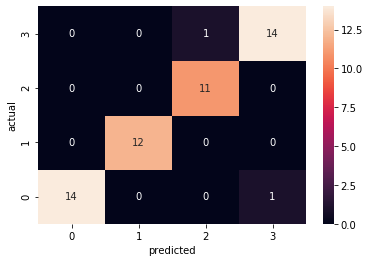

In [16]:
con=metrics.confusion_matrix(predicted_values,y_test)
sns.heatmap(con,annot=True)
plt.xlim(0,4)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.ylim(0,4)
plt.show()

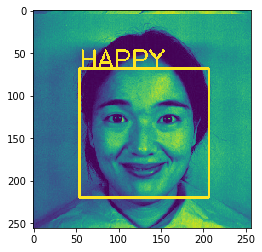

In [66]:
#testing on single image
img=cv2.imread("E:/Python/Scripts/jaffe/HAPPY/happy15.jpg",cv2.IMREAD_GRAYSCALE)
final_image_test=hog(img,orientations=9,pixels_per_cell=(8,8),cells_per_block=(1,1),visualize=False,multichannel=False)
final_image_test=final_image_test.reshape(1,-1)
final_image_test.shape
c=model.predict(final_image_test)
name_cat=categories[int(c)] #printing the category from which category the image is belongs.

face=face_cascade.detectMultiScale(img)
for x,y,w,h in face:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


    img_final=img[y:y+h,x:x+w]

    cv2.putText(img,name_cat,(x,y),cv2.FONT_HERSHEY_SIMPLEX ,1,(255,255,0),2)
    plt.imshow(img)
    plt.show()


In [17]:
import pickle 
X.shape

(521, 9216)

In [18]:
saving=np.array(saving).reshape(-1,48,48,1)
pickle.dump(saving,open('FacialX.pickle','wb'))#here we have to chane in (-1,50,50,1)

In [19]:
pickle.dump(y,open('Facialy.pickle','wb'))

In [20]:
f=pickle.load(open('Facialy.pickle','rb'))
f[5]

1

In [21]:
#predicting using live camera
num_sample=20
vid=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
iter1=0

while True:
    r,frame=vid.read()
    frame=cv2.resize(frame,(640,450))
    img=cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
    
    face=face_cascade.detectMultiScale(img)
    
    for x,y,w,h in face:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
        
        img_final=img[y:y+h,x:x+w]
        
        img_final=cv2.resize(img_final,(256,256))#resize the image 
        feat=hog(img_final,orientations=9,pixels_per_cell=(8,8),cells_per_block=(1,1),visualize=False,multichannel=False)
        #extract features using hog.
        #img_final=cv2.resize(img_final,(48,48))
        img_final=feat.reshape(1,-1)
        acc=model.predict(img_final)
        name=categories[int(acc)]
        
        print(name)
        
        
        cv2.putText(frame,name,(x,y),cv2.FONT_HERSHEY_SIMPLEX ,2,(255,0,0),2)
        
    
        #cv2.imwrite('.\\testingimage\\{}.jpg'.format(iter1),img_final)
        #cv2.waitKey(100)
        
        #cv2.waitkey(1)
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

ANGRY
HAPPY
HAPPY
HAPPY
SAD
ANGRY
ANGRY
ANGRY
HAPPY
HAPPY
SAD
HAPPY
HAPPY
HAPPY
ANGRY
ANGRY
HAPPY
HAPPY
HAPPY
ANGRY
HAPPY
HAPPY
ANGRY
HAPPY
HAPPY
ANGRY
HAPPY
HAPPY
ANGRY
ANGRY
ANGRY
ANGRY
HAPPY
ANGRY
HAPPY
HAPPY
ANGRY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
ANGRY
HAPPY
ANGRY
HAPPY
ANGRY
SAD
SAD
ANGRY
SAD
SAD
SAD
SAD
SAD
SAD
SAD
SAD
ANGRY
SAD
ANGRY
SAD
SAD
SAD
SAD
ANGRY
SAD
ANGRY
SAD
ANGRY
SAD
SAD
SAD
ANGRY
HAPPY
HAPPY
ANGRY
SAD
SAD
SAD
HAPPY
SAD
ANGRY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
NEUTRAL
HAPPY
ANGRY
HAPPY
HAPPY
ANGRY
HAPPY
ANGRY
HAPPY
ANGRY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
ANGRY
ANGRY
ANGRY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
ANGRY
HAPPY
ANGRY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
HAPPY
ANGRY
HAPPY
ANGRY
SAD
SAD
SAD
SAD
SAD
SAD
SAD
NEUTRAL
SAD
SAD
SAD
SAD
SAD
SAD
SAD
SAD
ANGRY
SAD
SAD
SAD
SAD
SAD
SAD
HAPPY
HAPPY
HAPPY
SAD
SAD
SAD
HAPPY
SAD
SAD
ANGRY
ANGRY
SAD
ANGRY
SAD
SAD
SAD
SAD
ANGRY
SAD
HAPPY
SAD
SAD
